In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics 
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

In [65]:
dta =sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [66]:
dta["affair"]=(dta["affairs"]>0).astype(int)

In [67]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [68]:
#Checking any missimg val is present
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [69]:
#Creating x and y
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [70]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [71]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [72]:
# fix column names of X
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [73]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [74]:
#y = np.ravel(y)

In [75]:
type(y)

pandas.core.frame.DataFrame

In [76]:
len(X.columns)

17

C:\Users\nanda\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nanda\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\nanda\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\nanda\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\nanda\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\nanda\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

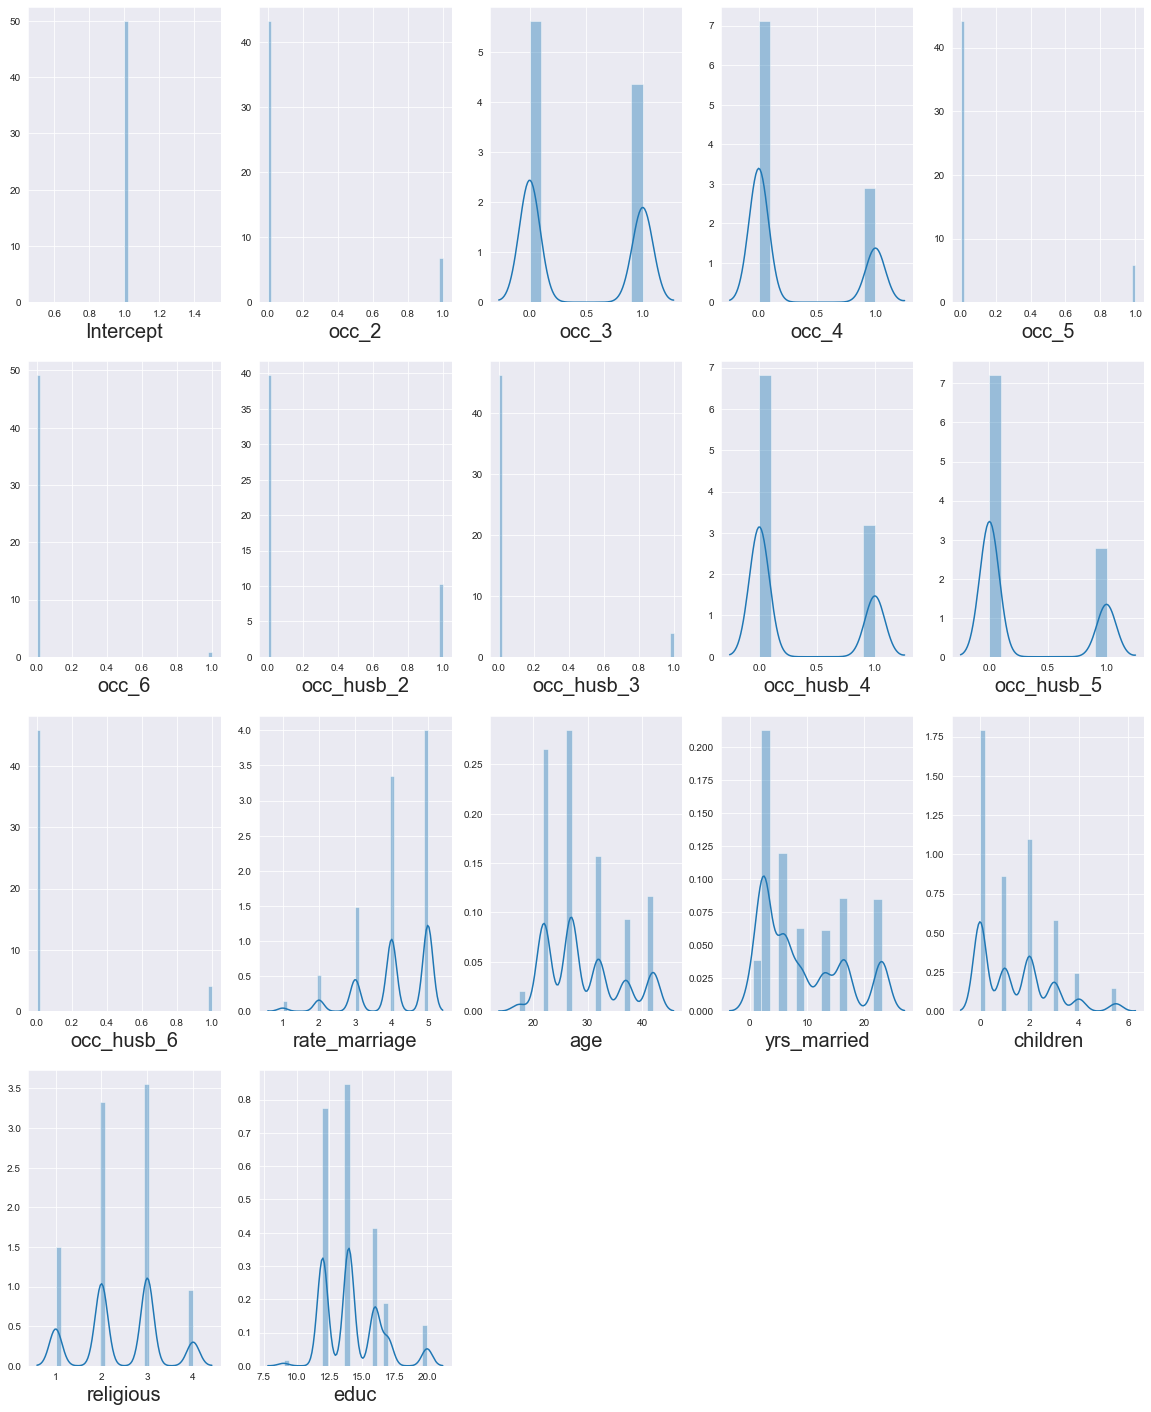

In [77]:
import seaborn as sns
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=len(X.columns) :     # as there are 9 columns in the data
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

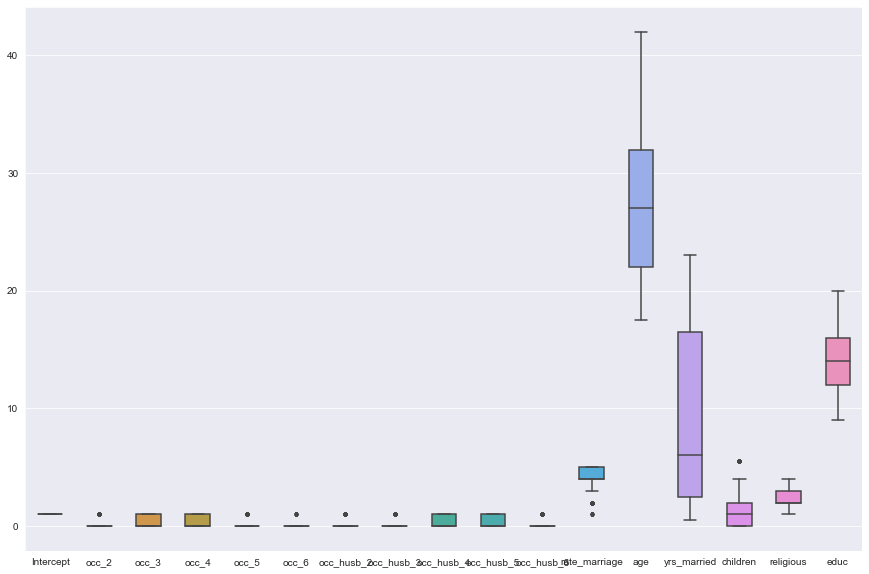

In [78]:
#Now Checking and removing the outlier
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=X,width=0.5,ax=ax,fliersize=3)

In [79]:
from sklearn.preprocessing import StandardScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
scalar=StandardScaler()
x_Scaled=scalar.fit_transform(dta)

vif=pd.DataFrame()
vif["Features"]=dta.columns
vif["vif"]=[variance_inflation_factor(x_Scaled,i) for i in range(x_Scaled.shape[1])]
vif
#As Vif is < 5 there is no multi colinearity 

,Features,vif
0,rate_marriage,1.143093
1,age,5.485728
2,yrs_married,7.325204
3,children,2.529107
4,religious,1.057794
5,educ,1.297515
6,occupation,1.211160
7,occupation_husb,1.082913
8,affairs,1.338256
9,affair,1.507392


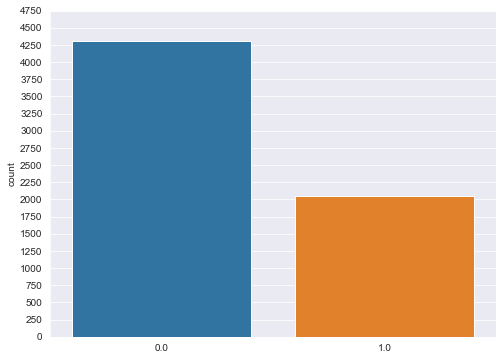

In [81]:
#Check wheather the data set is balanced 
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

It s seen data set with more rows where woman had not done affairs is present(almost double). Hence let us sample the dataset.

In [82]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler
rdm=RandomOverSampler()

In [83]:
X,y=rdm.fit_sample(X,y)

In [84]:
type(X)

pandas.core.frame.DataFrame

In [85]:
type(y)

pandas.core.frame.DataFrame

In [93]:
df.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ', 'affair'],
      dtype='object')

In [91]:
df=pd.concat([X,y],axis=1)  #updating the balanced form of dataset
print(df[df["affair"]==0].shape)
print(df[df["affair"]==1].shape)


(4313, 18)
(4313, 18)


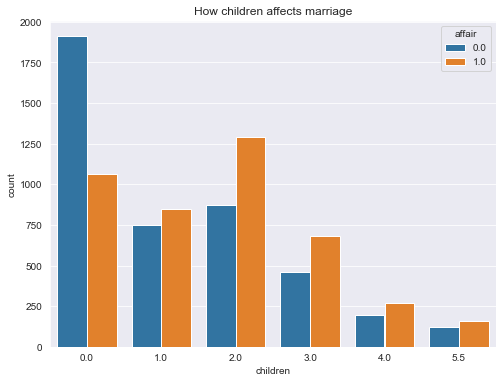

In [96]:
#Effect Of no Of Children on no of Affairs
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("children",data=df,hue="affair")
plt.title("How children affects marriage")
plt.show()

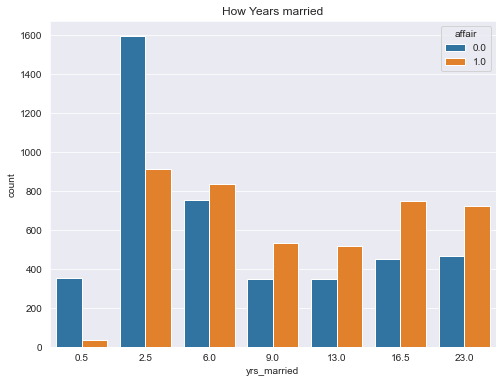

In [100]:
#Effect Of Years Married on no of Affairs
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("yrs_married",data=df,hue="affair")
plt.title("How Years married")
plt.show()

Thus if the woman is in between 9 to 13 years of mariied life,there is more chance of making affairs compared to just married or married for longer(more than 17 years) time 

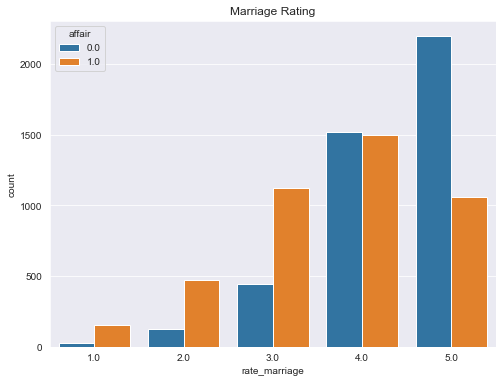

In [101]:
#BAsed on Marriage Rating
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("rate_marriage",data=df,hue="affair")
plt.title("Marriage Rating")
plt.show()

Thus irrespective of person happy with marriage life or sad can have affiar,as even other person who have affairs gave high rating 

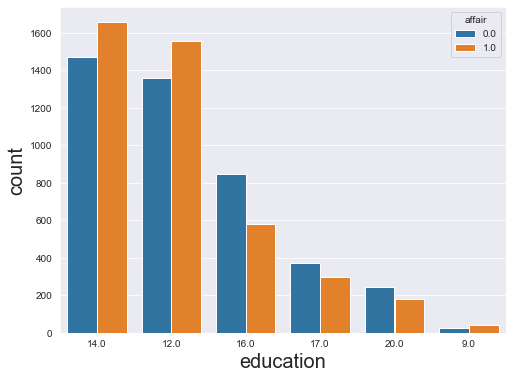

In [111]:
Based On education
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("educ",hue="affair",data=df,order=df["educ"].value_counts().index)
plt.xlabel("education",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree

Thus woman with some college degree/graduate have less chance of affair. Thus we can say if the woman is more educated there is less chance of affair.

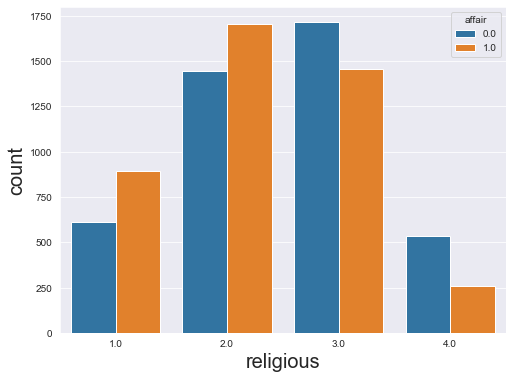

In [112]:
#Reglious
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("religious",hue="affair",data=df)
plt.xlabel("religious",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

More the woman is religous less the chance of having affairs 

In [113]:
y = np.ravel(y)

In [114]:
scalar=StandardScaler()
x_Scaled=scalar.fit_transform(X)

In [115]:
x_Scaled

array([[ 0.        ,  2.58084211, -0.89741734, ...,  1.0652579 ,
         0.71057989,  1.3251251 ],
       [ 0.        , -0.38747043,  1.11430875, ...,  1.0652579 ,
        -1.57099917, -0.06567581],
       [ 0.        , -0.38747043,  1.11430875, ..., -1.03554563,
        -1.57099917,  0.86152479],
       ...,
       [ 0.        , -0.38747043, -0.89741734, ...,  1.76552574,
        -0.43020964, -0.99287642],
       [ 0.        , -0.38747043,  1.11430875, ...,  0.36499005,
         0.71057989, -0.99287642],
       [ 0.        , -0.38747043, -0.89741734, ..., -1.03554563,
        -1.57099917,  1.3251251 ]])

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x_Scaled,y,test_size=0.25,random_state=33)

In [117]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [118]:
# check the accuracy on the training set
log_reg.score(x_train,y_train)

0.6804761168650487

In [119]:
y_pred=log_reg.predict(x_test)

In [120]:
y_pred

array([0., 0., 0., ..., 0., 1., 1.])

In [121]:
y_test

array([1., 0., 0., ..., 1., 0., 0.])

In [122]:
log_reg.predict([[1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0]])

array([0.])

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6773296244784422

In [124]:
dta[dta["affair"]==0]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
2053,4.0,32.0,9.0,2.0,3.0,14.0,2.0,4.0,0.0,0
2054,4.0,27.0,6.0,0.0,2.0,14.0,3.0,4.0,0.0,0
2055,4.0,22.0,2.5,0.0,2.0,14.0,3.0,2.0,0.0,0
2056,5.0,42.0,23.0,4.0,3.0,16.0,3.0,5.0,0.0,0
2057,5.0,27.0,2.5,1.0,3.0,20.0,2.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0


In [125]:
dta.iloc[2053,:]

rate_marriage       4.0
age                32.0
yrs_married         9.0
children            2.0
religious           3.0
educ               14.0
occupation          2.0
occupation_husb     4.0
affairs             0.0
affair              0.0
Name: 2053, dtype: float64

In [126]:
type(X.iloc[2053,:])

pandas.core.series.Series

In [127]:
X.iloc[2053,:]

Intercept         1.0
occ_2             1.0
occ_3             0.0
occ_4             0.0
occ_5             0.0
occ_6             0.0
occ_husb_2        0.0
occ_husb_3        0.0
occ_husb_4        1.0
occ_husb_5        0.0
occ_husb_6        0.0
rate_marriage     4.0
age              32.0
yrs_married       9.0
children          2.0
religious         3.0
educ             14.0
Name: 2053, dtype: float64

In [128]:

1,1,0,0,0,0,0,0,1,0,0,4,32,9,2,3,14

(1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 32, 9, 2, 3, 14)

In [129]:
log_reg.predict([[1,1,0,0,0,0,0,0,1,0,0,4,32,9,2,3,14]])

array([0.])

In [130]:
#Confusion Matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[759, 336],
       [360, 702]], dtype=int64)

In [131]:
#Accuracy Calulation
#(109+35)/(109+35+35+13)
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [132]:
#Accuracy Calulation
#(109+35)/(109+35+35+13)
accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
accuracy

0.6773296244784422

In [133]:
Precision=(true_positive/(true_positive+false_negative))
Precision

0.67828418230563

In [134]:
Recall=(true_positive/(true_positive+false_positive))
Recall

0.6931506849315069

In [135]:
F1score=(2*(Precision*Recall))/(Precision+Recall)
F1score

0.6856368563685636

In this case we will consider Precision of recall because if the person don't have any affair but still we are predicting that person may have affair then chances of divorce will increase.

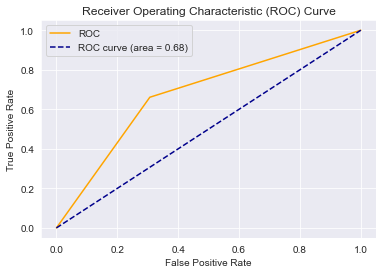

In [136]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()